<a href="https://colab.research.google.com/github/kooosee/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pandasの表を使って'IdentityⅤ'(ゲーム)のデータを作りグラフ化する



In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

表示するデータを選んでください
1:試合数
2:勝ち数
3:分け数
4:負け数
5:勝率(%)
6:個人データ
6
表示する選手名を入力してください
ZETA_vanpyi
ZETA_alf
RC_Aka
RC_shota
SZ_MiraiK
SZ_SiLia
AXIZ_Rose
CG_Surume
CG_Ryz
Dawn_Burio
Dawn_Wolf
FL_Hasha
FL_noNino
ZETA_alf


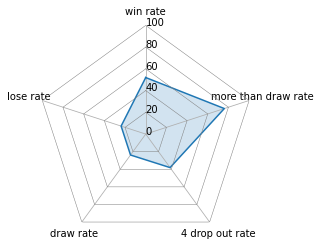

In [10]:
df=pd.DataFrame([ ['ZETA_vanpyi',12,1,8,3,8.0],['ZETA_alf',21,11,5,5,52],['RC_Aka',14,3,6,5,21],['RC_shota',22,6,9,7,27],['SZ_MiraiK',12,3,3,6,25],['SZ_SiLia',20,7,7,6,35],['AXIZ_Rose',32,8,10,14,25],['CG_Surume',6,4,1,1,66],['CG_Ryz',27,6,11,10,22],['Dawn_Burio',30,4,16,10,13],['Dawn_Wolf',3,0,1,2,0],['FL_Hasha',17,6,6,5,35],['FL_noNino',14,6,2,6,42] ])
df.columns=['選手名','試合数','勝ち数','分け数','負け数','勝率(%)']
df_winper=df.sort_values('勝率(%)',ascending=False)
df_winper
df2=pd.DataFrame([ [8.0,75.0,8.3,66.7,25.0],[52.0,76.0,38.1,23.8,23.8],[21.0,64.0,7.1,42.9,35.7],[27.0,68.0,13.6,40.9,31.8],[25.0,50.0,16.7,25.0,50.0],[35.0,70.0,20.0,35.0,30.0],[25.0,56.0,12.5,31.3,43.8],[66.0,83.0,33.3,16.7,16.7],[22.0,63.0,14.8,40.7,37.0],[13.0,66.0,6.70,53.3,33.3],[0.0,33.0,0.0,33.3,66.7],[35.0,70.0,17.6,35.0,29.4],[42.0,57.0,21.4,14.3,42.0] ])
df2.columns=['勝率','引き分け以上率','4吊り率','引き分け率','負け率']
df2.index=['ZETA_vanpyi','ZETA_alf','RC_Aka','RC_shota','SZ_MiraiK','SZ_SiLia','AXIZ_Rose','CG_Surume','CG_Ryz','Dawn_Burio','Dawn_Wolf','FL_Hasha','FL_noNino']
namelist=['ZETA_vanpyi','ZETA_alf','RC_Aka','RC_shota','SZ_MiraiK','SZ_SiLia','AXIZ_Rose','CG_Surume','CG_Ryz','Dawn_Burio','Dawn_Wolf','FL_Hasha','FL_noNino']
def graphmake():
  while True:
    info=int(input('表示するデータを選んでください\n1:試合数\n2:勝ち数\n3:分け数\n4:負け数\n5:勝率(%)\n6:個人データ\n'))
    if info==1:
      plt.figure(figsize=(15,5))
      plt.bar(df['選手名'],df['試合数'])
      break
    elif info==2:
      plt.figure(figsize=(15,5))
      plt.bar(df['選手名'],df['勝ち数'])
      break
    elif info==3:
      plt.figure(figsize=(15,5))
      plt.bar(df['選手名'],df['分け数'])
      break
    elif info==4:
      plt.figure(figsize=(15,5))
      plt.bar(df['選手名'],df['負け数'])
      break
    elif info==5:
      plt.figure(figsize=(15,5))
      plt.bar(df['選手名'],df['勝率(%)'])
      break
    elif info==6:
      while True:
        name=input('表示する選手名を入力してください\nZETA_vanpyi\nZETA_alf\nRC_Aka\nRC_shota\nSZ_MiraiK\nSZ_SiLia\nAXIZ_Rose\nCG_Surume\nCG_Ryz\nDawn_Burio\nDawn_Wolf\nFL_Hasha\nFL_noNino\n')
        if name not in namelist:
          continue
        else:
          def radarchart(name):
            labels=['win rate','more than draw rate','4 drop out rate','draw rate','lose rate']
            radar_values=np.concatenate([df2.loc[name],[df2.loc[name]['勝率']]])   #5角形閉じる
            angles=np.linspace(0,2*np.pi,6,endpoint=True)   #角度
            grid=[0,20,40,60,80,100]                                #メモリ
            fig=plt.figure(facecolor='w')
            ax=fig.add_subplot(1, 1, 1, polar=True)                 #極座標
            ax.plot(angles, radar_values)                           #線引き
            ax.fill(angles, radar_values, alpha=0.2)                #塗りつぶし
            ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels)    #項目
            ax.set_rgrids([])                                       #円形のメモリを消す
            ax.spines['polar'].set_visible(False)                   #外側の円を消す
            ax.set_theta_zero_location("N")                         #始点を北に
            ax.set_theta_direction(-1)                              #時計回り
            for grid_value in grid:
              grid_values = [grid_value] * (len(labels)+1)
              ax.plot(angles, grid_values, color="gray",  linewidth=0.5)  #メモリ
            for i in grid:
              ax.text(x=0,y=i,s=i)
            ax.set_rlim([min(grid), max(grid)])
          radarchart(name)
          break
      break
    else:
      continue
    plt.show()

graphmake()
